# Оценка качества модели

Рассмотрим как оценивать качество модели для задачи регрессии, задачи классификации и выучим еще один термин.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Пример регрессии

Сгенерируем большее количество точек, для это воспользуемся функционалом `numpy random`

Команда `np.random.rand(10, 1)` сгенерирует 10 случаных чисел со значениями 0 до 1

In [ ]:
np.random.rand(10, 1)

array([[0.47820437],
       [0.13942879],
       [0.58690915],
       [0.83267358],
       [0.02263952],
       [0.12522711],
       [0.17501152],
       [0.06570291],
       [0.91674534],
       [0.5674823 ]])

Команда `np.random.randn(10, 1)` сгенерирует 10 случаных чисел, среднее которых будет равно 0

In [ ]:
np.random.randn(10, 1)

array([[-0.39473867],
       [ 0.40228879],
       [ 1.03575356],
       [-0.12683052],
       [-0.42709949],
       [ 1.15924957],
       [ 0.35449589],
       [ 0.68103443],
       [ 1.05346117],
       [-1.02714685]])

Пусть нам заданы 1000 точек:

In [ ]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 5 * x + np.random.randn(1000, 1)

Запишем значения `x` и `y` в таблицу.

In [ ]:
d = {'x': x.reshape(1,1000)[0], 'y': y.reshape(1,1000)[0]}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,3.642370
1,0.715189,4.595226
2,0.602763,5.863408
3,0.544883,3.510249
4,0.423655,2.619257


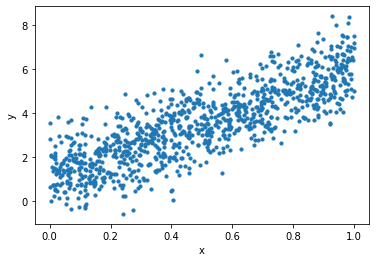

In [ ]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Разделим на обучающую и тестовую выборки в отношении 70% и 30%.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

In [ ]:
train.head()

,x,y
498,0.248413,2.747454
243,0.132068,1.899374
314,0.672048,3.958941
202,0.377752,3.579188
300,0.906555,5.600270


In [ ]:
train.shape

(700, 2)

In [ ]:
train.index

Int64Index([498, 243, 314, 202, 300, 682, 230, 306, 166, 620,
            ...
            106, 595,  17, 742,  98, 988, 322, 382, 365, 510],
           dtype='int64', length=700)

In [ ]:
test.head()

,x,y
131,0.428769,1.602256
203,0.179604,2.694690
50,0.570197,3.183271
585,0.247399,4.879929
138,0.652103,3.408787


In [ ]:
test.shape

(300, 2)

In [ ]:
test.index

Int64Index([131, 203,  50, 585, 138, 632, 328, 461, 924, 479,
            ...
            914, 887, 946, 723, 240, 556, 598, 458, 586, 178],
           dtype='int64', length=300)

То есть в обучающую выборку у нас попало ровно 700 объектов и в тестовую ровно 300. Отобразим их на графике.

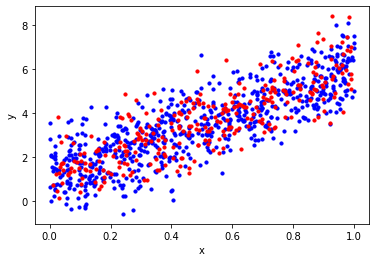

In [ ]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Синими точками на графике обозначены объекты обучающей выборки, красными - объекты тестовой выборки

Посмотрим на график предполагаемой модели и посчитаем ошибку MAE

In [ ]:
def model(x):
  y_model = 1 + 5 * x
  return y_model

train['y_model'] = train['x'].map(lambda x: model(x))

In [ ]:
train

,x,y,y_model
498,0.248413,2.747454,2.242067
243,0.132068,1.899374,1.660341
314,0.672048,3.958941,4.360239
202,0.377752,3.579188,2.888759
300,0.906555,5.600270,5.532777
...,...,...,...
988,0.213835,2.938183,2.069177
322,0.055374,1.954334,1.276872
382,0.951874,6.980757,5.759372
365,0.458604,3.340086,3.293020


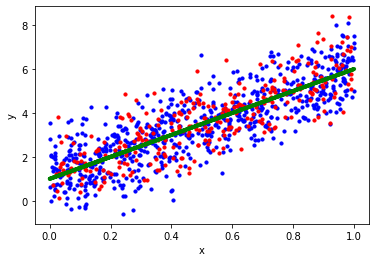

In [ ]:
# plot
plt.plot(train['x'], train['y_model'], linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Определим качество модели лучше с помощью уже известной нам MAE:

In [ ]:
test['y_model'] = test['x'].map(lambda x: model(x))

In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE для обучающей выборки:', mean_absolute_error(train['y'], train['y_model']))
print('MAE для тестовой выборки:', mean_absolute_error(test['y'], test['y_model']))


MAE для обучающей выборки: 0.7860303603475216
MAE для тестовой выборки: 0.7255453212465155
